# <center>Team Bible Final Project</center>
Created by Mert, Ari, and Artorius. Our goal of this project is to compare bible translations. For this project, we look at the KJV, NASB, NET, and TLB bibles.

### Part 1: Uploading the texts to data frames
Our goal here is to create data frames for each text such that we have one column called book_chapter, and another column for the text within those chapters. 

In [1]:
import re
import pandas as pd

In [2]:
# KJV
with open("data/kjv.txt", encoding="utf-8") as f:
    kjv_v = f.read().splitlines()

kjv_v = [line for line in kjv_v if line != "."]
kjv_book_chapter_verse = [re.search(r'[a-z]+ \d+:\d+', line).group() for line in kjv_v]
kjv_book = [re.search(r'\w+', chapter_verse).group() for chapter_verse in kjv_book_chapter_verse]
kjv_chapter = [re.search(r'\d+', chapter_verse).group() for chapter_verse in kjv_book_chapter_verse]
kjv_verse_number = [re.search(r'\d+$', line).group() for line in kjv_v]
kjv_verse_text = [re.sub(r'-- [a-z]+ \d+:\d+', '', line) for line in kjv_v]

kjv_df = pd.DataFrame({
    'book': kjv_book,
    'chapter': kjv_chapter,
    'verse': kjv_verse_number,
    'text': kjv_verse_text
})

# Create book_chapter column
kjv_df.name = 'KJV'
kjv_df = kjv_df.groupby(['book', 'chapter']).agg({'text': ' '.join}).reset_index()
kjv_df['book_chapter'] = kjv_df[['book', 'chapter']].apply(lambda x: ' '.join(x), axis=1)
kjv_df.drop(['book', 'chapter'], axis=1, inplace=True)
kjv_df = kjv_df.iloc[:, [1, 0]]

# extract gospels
kjv_gospels = kjv_df[kjv_df['book_chapter'].str.contains('matthew|mark|luke|john')].reset_index(drop=True)

In [3]:
# NASB
with open("data/nasb.txt", encoding="utf-8") as f:
    nasb_v = f.read().splitlines()

nasb_v = [line for line in nasb_v if line != "."]
nasb_book_chapter_verse = [re.search(r'[a-z]+ \d+:\d+', line).group() for line in nasb_v]
nasb_book = [re.search(r'\w+', line).group() for line in nasb_book_chapter_verse]
nasb_chapter = [re.search(r'\d+', line).group() for line in nasb_book_chapter_verse]
nasb_verse_number = [re.search(r'\d+$', line).group() for line in nasb_v]
nasb_verse_text = [re.sub(r'-- [a-z]+ \d+:\d+', '', line) for line in nasb_v]

nasb_df = pd.DataFrame({
    "book": nasb_book,
    "chapter": nasb_chapter,
    "verse": nasb_verse_number,
    "text": nasb_verse_text
})

nasb_df.name = 'NASB'
nasb_df = nasb_df.groupby(['book', 'chapter']).agg({'text': ' '.join}).reset_index()
nasb_df['book_chapter'] = nasb_df[['book', 'chapter']].apply(lambda x: ' '.join(x), axis=1)
nasb_df.drop(['book', 'chapter'], axis=1, inplace=True)
nasb_df = nasb_df.iloc[:, [1, 0]]

# gospels
# extract gospels
nasb_gospels = nasb_df[nasb_df['book_chapter'].str.contains('matthew|mark|luke|john')].reset_index(drop=True)

In [4]:
# NET
with open("data/net.txt", encoding="utf-8") as f:
    net_v = f.read().splitlines()

net_v = [line for line in net_v if line != "."]
net_book_chapter_verse = [re.search(r'[a-z]+ \d+:\d+', line).group() for line in net_v]
net_book = [re.search(r'\w+', line).group() for line in net_book_chapter_verse]
net_chapter = [re.search(r'\d+', line).group() for line in net_book_chapter_verse]
net_verse_number = [re.search(r'\d+$', line).group() for line in net_v]
net_verse_text = [re.sub(r'-- [a-z]+ \d+:\d+', '', line) for line in net_v]

net_df = pd.DataFrame({
    "book": net_book,
    "chapter": net_chapter,
    "verse": net_verse_number,
    "text": net_verse_text
})

net_df.name = 'NET'
net_df = net_df.groupby(['book', 'chapter']).agg({'text': ' '.join}).reset_index()
net_df['book_chapter'] = net_df[['book', 'chapter']].apply(lambda x: ' '.join(x), axis=1)
net_df.drop(['book', 'chapter'], axis=1, inplace=True)
net_df = net_df.iloc[:, [1, 0]]

# extract gospels
net_gospels = net_df[net_df['book_chapter'].str.contains('matthew|mark|luke|john')].reset_index(drop=True)

In [5]:
# TLB
with open("data/living.txt", encoding="utf-8") as f:
    living_v = f.read().splitlines()

start_living = living_v.index("Genesis 1")
end_living = living_v.index("21 The grace of our Lord Jesus Christ be with you all. Amen!")
living_v = living_v[start_living:end_living+1]

living_chapters = [i for i in range(len(living_v)) if re.search(r'^([0-9] )?[A-z][a-z]* \d*$', living_v[i])]
living_chapters += [len(living_v)]
living_chapters = sorted(living_chapters + [i for i in range(len(living_v)) if re.search(r'Song of Solomon \d*$', living_v[i])])
living_df = pd.DataFrame(columns=["book_chapter", "text"])
living_df.name = 'TLB'

for i in range(len(living_chapters)-1):
    book_chapter = living_v[living_chapters[i]].lower()
    if book_chapter[0].isdigit():
        book_chapter = book_chapter.split(' ', 1)[1]
    start = living_chapters[i] + 1
    end = living_chapters[i+1] - 1
    chapter_lines_v = living_v[start:end]
    chapter_text = ' '.join(chapter_lines_v)
    
    row = pd.DataFrame([[book_chapter, chapter_text]], columns=["book_chapter", "text"])
    living_df = pd.concat([living_df, row], ignore_index=True)

# order like the others
living_df = living_df.sort_values(by='book_chapter')
living_df = living_df.groupby(['book_chapter']).agg({'text': ' '.join}).reset_index()

# extract gospels
living_gospels = living_df[living_df['book_chapter'].str.contains('matthew|mark|luke|john')].reset_index(drop=True)

### Part 2: Exploratory Analysis
It is here that we will begin looking at some general metrics in order to explore where the four books really differ, or don't differ at all. The point of this is to be a breadth-first search.

Word counts by chapter:

In [26]:
dataframes = [nasb_df, net_df, living_df, kjv_df]
dataframes_names = ['nasb_df', 'net_df', 'living_df', 'kjv_df']
means = []

for i, df in enumerate(dataframes):
    # Concatenate book_chapter and text columns
    df['chapter_text'] = df['book_chapter'].astype(str) + ": " + df['text']

    # Get word counts by chapter
    word_counts = df['chapter_text'].apply(lambda x: len(x.split()))

    # Create a new data frame with chapter titles and word counts
    chapter_word_counts = pd.DataFrame({'chapter': df['book_chapter'], 'word_count': word_counts})

    # Output
    mean_word_count = chapter_word_counts.mean()
    means.append(mean_word_count)

for name, mean in zip(dataframes_names, means):
    print(f"{name} mean word count per chapter: {mean[0]:.2f}")

nasb_df mean word count per chapter: 739.44
net_df mean word count per chapter: 720.74
living_df mean word count per chapter: 684.04
kjv_df mean word count per chapter: 753.60


C:\TEMP\ipykernel_13640\1169338892.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_word_count = chapter_word_counts.mean()


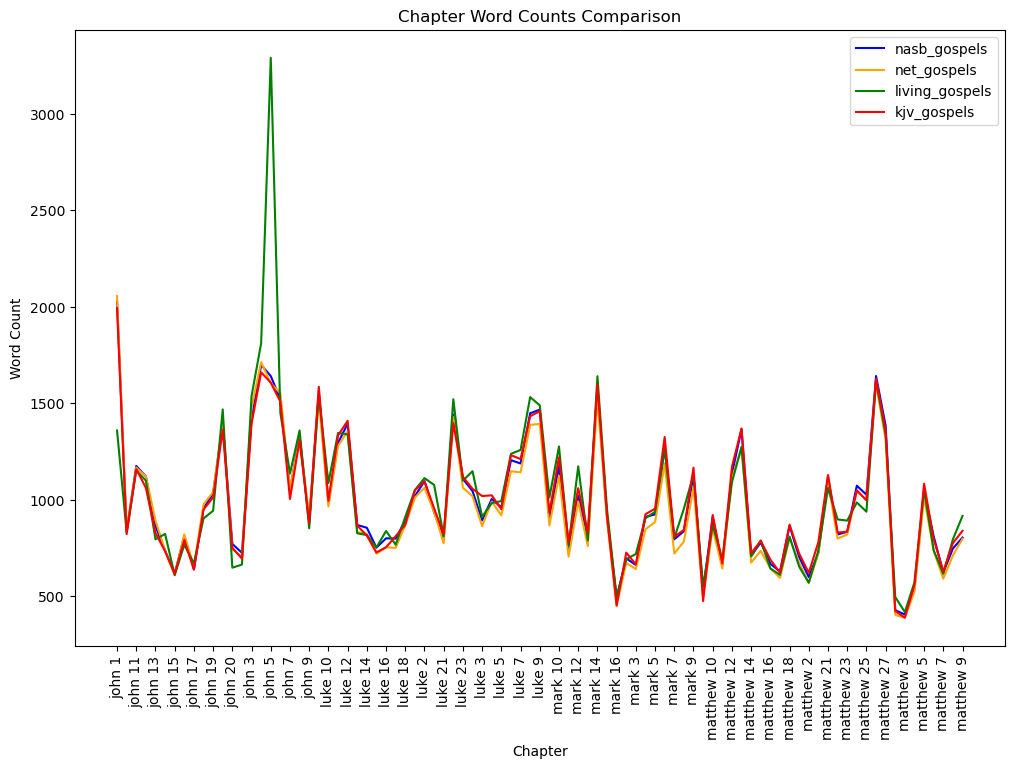

In [24]:
import matplotlib.pyplot as plt

gospels = [nasb_gospels, net_gospels, living_gospels, kjv_gospels]
gospels_names = ['nasb_gospels', 'net_gospels', 'living_gospels', 'kjv_gospels']
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(12, 8))
plt.title('Chapter Word Counts Comparison')
plt.xlabel('Chapter')
plt.ylabel('Word Count')

for i, df in enumerate(gospels):
    df['chapter_text'] = df['book_chapter'].astype(str) + ": " + df['text']
    word_counts = df['chapter_text'].apply(lambda x: len(x.split()))
    chapter_word_counts = pd.DataFrame({'chapter': df['book_chapter'], 'word_count': word_counts})
    plt.plot(chapter_word_counts['chapter'], chapter_word_counts['word_count'], color=colors[i], label=dataframes_names[i])

# fancy shiz
plt.legend()
plt.xticks(range(0, len(dataframes[0]), 2), rotation=90)

# Show the plot
plt.show()

Most-used Words:

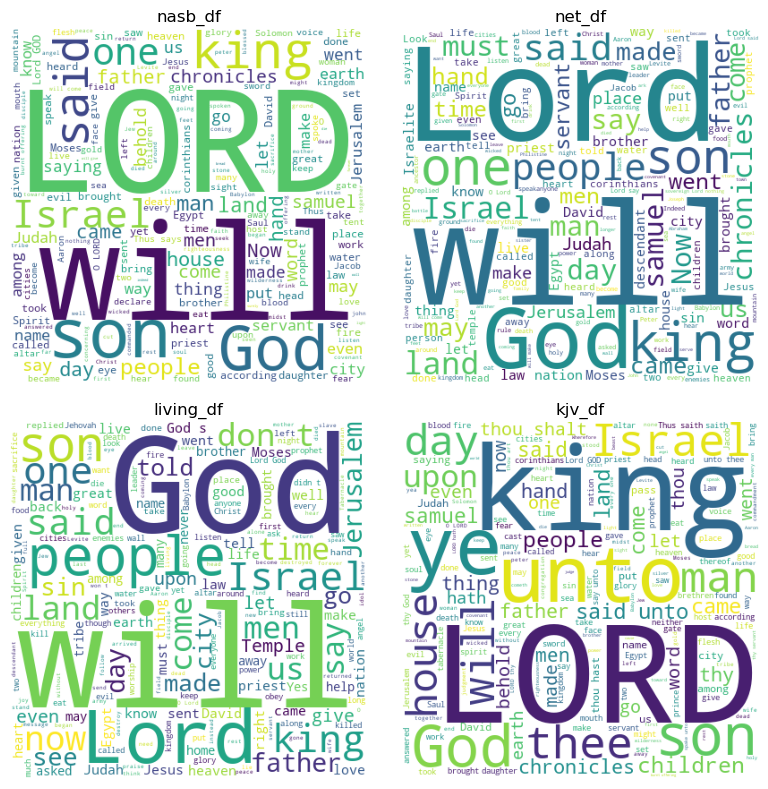

In [27]:
from wordcloud import WordCloud, STOPWORDS

# Define a function to generate a word cloud
def generate_wordcloud(df, name, ax):
    text = ' '.join(df['chapter_text'].tolist())
    wordcloud = WordCloud(width=400, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
    ax.imshow(wordcloud)
    ax.axis('off')
    ax.set_title(name)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Generate word clouds for each data frame and plot them in a separate subplot
for i, df in enumerate(dataframes):
    df.name = f"DataFrame{i}"  # Set the name of the dataframe
    row = i // 2  # Determine the row of the subplot
    col = i % 2   # Determine the column of the subplot
    generate_wordcloud(df, dataframes_names[i], axs[row, col])

plt.tight_layout()
plt.show()

Parts of Speech used:

In [33]:
pip install ruamel-yaml
pip install spacy

SyntaxError: invalid syntax (2371492216.py, line 1)

In [31]:
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Define a function to analyze the parts of speech in a text
def analyze_pos(text):
    doc = nlp(text)
    pos_counts = doc.count_by(spacy.attrs.POS)
    pos_labels = {pos: nlp.vocab[pos].text for pos in pos_counts.keys()}
    pos_freqs = {pos_labels[pos]: pos_counts[pos] for pos in pos_counts.keys()}
    return pos_freqs

texts = [kjv_v, nasb_v, net_v, living_v]
for bible in texts:
    pos_freqs = analyze_pos(bible)
    print(pos_freqs)

ModuleNotFoundError: No module named 'spacy'